## Dataviz

Nesse notebook, irei analisar mais aprofundada dos dados e realizar sumarizações para iniciar a modelagem.

In [1]:
import os
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
%matplotlib inline
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando csv do notebook `01_dataprep`

In [0]:
usecols = ['time', 'ca', 'unit', 'scp', 'station', 'linename', 'division', 'entries_diff', 'exits_diff']

df = pd.read_csv('/content/drive/My Drive/Raizen/df.csv.gz', usecols=usecols,
                 parse_dates=['time'], dtype={'entries_diff': 'int', 'exits_diff': 'int'})

In [5]:
df.shape

(50769388, 9)

## Plottings

Antes de criar variáveis para começar a modelagem, farei alguns gráficos descritivos dos dados.

### Time plottings

In [0]:
def timespan_hour(df):
  df['timespan_start'] = None
  df['timespan'] = None
  
  df.loc[df['hour'].isin([0,4, 8,12,16,20]), 'timespan_start'] = 'start_00h'
  df.loc[df['hour'].isin([1,5, 9,13,17,21]), 'timespan_start'] = 'start_01h'
  df.loc[df['hour'].isin([2,6,10,14,18,22]), 'timespan_start'] = 'start_02h'
  df.loc[df['hour'].isin([3,7,11,15,19,23]), 'timespan_start'] = 'start_03h'

  df.loc[df['hour']== 0, 'timespan'] = '20h_00h'
  df.loc[df['hour']== 1, 'timespan'] = '21h_01h'
  df.loc[df['hour']== 2, 'timespan'] = '22h_02h'
  df.loc[df['hour']== 3, 'timespan'] = '23h_03h'
  df.loc[df['hour']== 4, 'timespan'] = '00h_04h'
  df.loc[df['hour']== 5, 'timespan'] = '01h_05h'
  df.loc[df['hour']== 6, 'timespan'] = '02h_06h'
  df.loc[df['hour']== 7, 'timespan'] = '03h_07h'
  df.loc[df['hour']== 8, 'timespan'] = '04h_08h'
  df.loc[df['hour']== 9, 'timespan'] = '05h_09h'
  df.loc[df['hour']==10, 'timespan'] = '06h_10h'
  df.loc[df['hour']==11, 'timespan'] = '07h_11h'
  df.loc[df['hour']==12, 'timespan'] = '08h_12h'
  df.loc[df['hour']==13, 'timespan'] = '09h_13h'
  df.loc[df['hour']==14, 'timespan'] = '10h_14h'
  df.loc[df['hour']==15, 'timespan'] = '11h_15h'
  df.loc[df['hour']==16, 'timespan'] = '12h_16h'
  df.loc[df['hour']==17, 'timespan'] = '13h_17h'
  df.loc[df['hour']==18, 'timespan'] = '14h_18h'
  df.loc[df['hour']==19, 'timespan'] = '15h_19h'
  df.loc[df['hour']==20, 'timespan'] = '16h_20h'
  df.loc[df['hour']==21, 'timespan'] = '17h_21h'
  df.loc[df['hour']==22, 'timespan'] = '18h_22h'
  df.loc[df['hour']==23, 'timespan'] = '19h_23h'

  return df

In [0]:
  df['month'] = df['time'].dt.month
  df['year'] = df['time'].dt.year
  
  weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  df['weekday'] = df['time'].dt.weekday_name
  df['weekday'] = pd.Categorical(df['weekday'], categories=weekdays, ordered = True)

  df['hour'] = df['time'].dt.hour

  df = timespan_hour(df)
  df['timespan_start'].value_counts(normalize=True).round(3)

  df.drop('time', axis=1, inplace=True)

In [0]:
def plot_monthly(df):
  fig, ax = plt.subplots(1, 2, figsize=(18, 6),sharey=True)

  p_entries = pd.pivot_table(df, index=df['month'], columns=df['year'],
                             values='entries_diff', aggfunc='sum')
  
  p_exits = pd.pivot_table(df, index=df['month'], columns=df['year'],
                             values='exits_diff', aggfunc='sum')
  
  p_entries.plot(ax=ax[0], title='Entries', legend=False)
  p_exits.plot(ax=ax[1], title='Exits')
  plt.show()

Abaixo estão representados a evolução do fluxo das catracas de entradas e saídas ao longo os meses para cada ano.

Podemos observar que em 2011 a movimentação foi menor que nos anos seguintes e aparentemente outubro tem um pico de fluxo seguido por recuo em novembro.

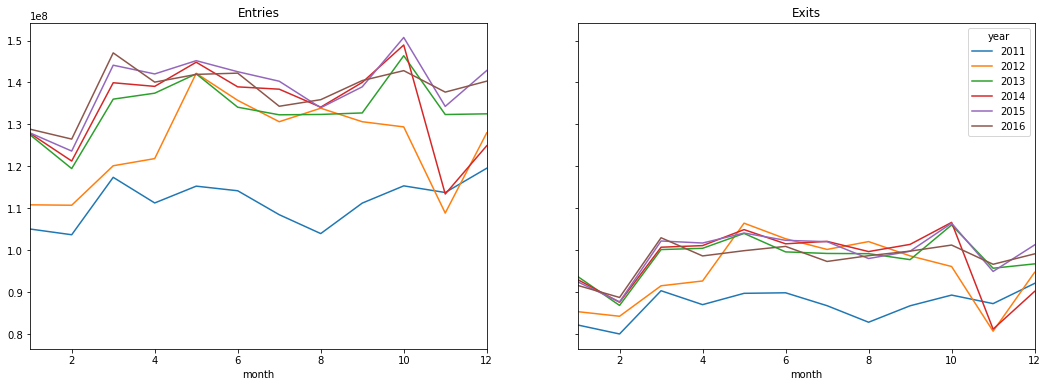

In [9]:
plot_monthly(df)

In [0]:
def plot_weekly(df):
  fig, ax = plt.subplots(1, 2, figsize=(18, 6),sharey=True)

  p_entries = pd.pivot_table(df, index=df['weekday'], columns=df['month'],
                             values='entries_diff', aggfunc='sum')
  
  p_exits = pd.pivot_table(df, index=df['weekday'], columns=df['month'],
                             values='exits_diff', aggfunc='sum')

  p_entries.plot(ax=ax[0], title='Entries', legend=False)
  p_exits.plot(ax=ax[1], title='Exits')
  plt.show()

O fluxo para entrada e saída ao longo dos dias da semana para cada mês é representado abaixo.

Podemos observar que a movimentação mantém consistência para cada mês e que aos finais de semana a movimentação diminui.

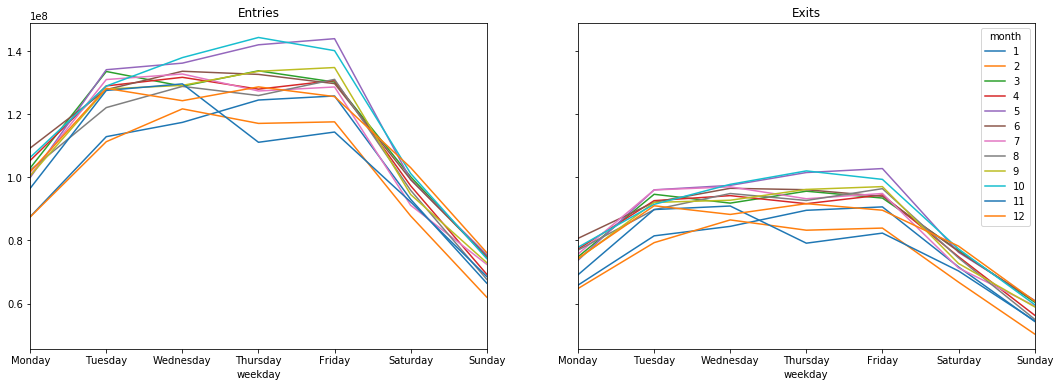

In [11]:
plot_weekly(df)

In [0]:
def plot_hourly(df):
  fig, ax = plt.subplots(1, 2, figsize=(18, 6),sharey=True)

  num_hours = sorted(df['hour'].unique())
  
  p_entries = pd.pivot_table(df, index=df['hour'], columns=df['weekday'],
                             values='entries_diff', aggfunc='sum')
  
  p_exits = pd.pivot_table(df, index=df['hour'], columns=df['weekday'],
                             values='exits_diff', aggfunc='sum')
  
  p_entries.plot(ax=ax[1], title='Entries', legend=False)
  plt.xticks(num_hours)
  
  p_exits.plot(ax=ax[0], title='Exits')
  plt.xticks(num_hours)

  plt.show()

Abaixo podemos notar os fluxos de entrada e saída para cada hora em cada dia da semana.

Aparentemente há muitos picos de fluxo, mas isso pode ser por causa da volumetria desbalanceada do horário de captura do dado.

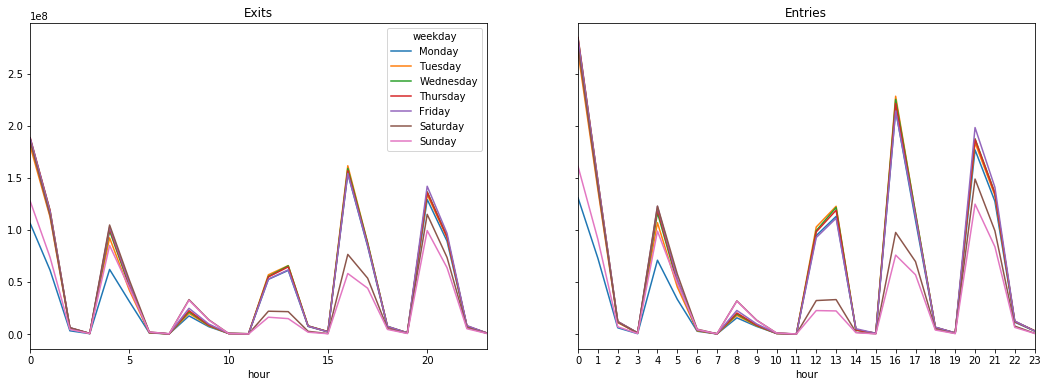

In [6]:
plot_hourly(df)

Abaixo realizei a mesma visualização, filtrando os dados de acordo com o horário que ele iniciou a coleta (`00h`,`01h`, `002h` ou `03h`). Podemos notar que há consistência nos fluxos em horários semelhantes.

<------------ start_00h ------------>


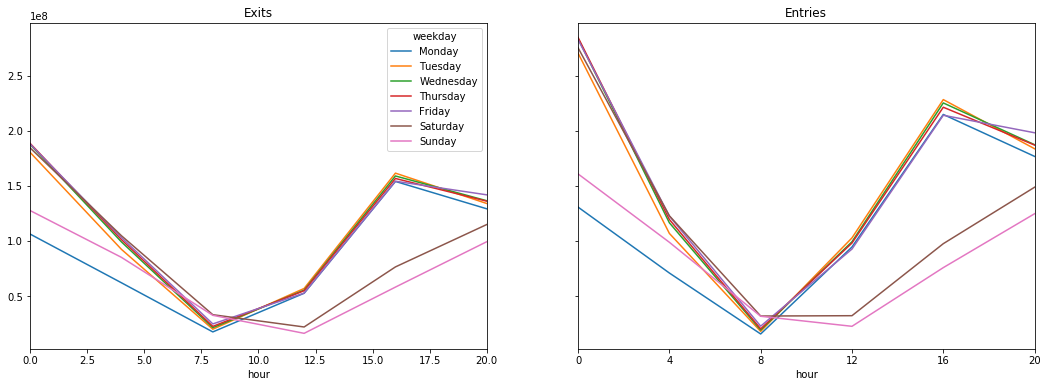

<------------ start_01h ------------>


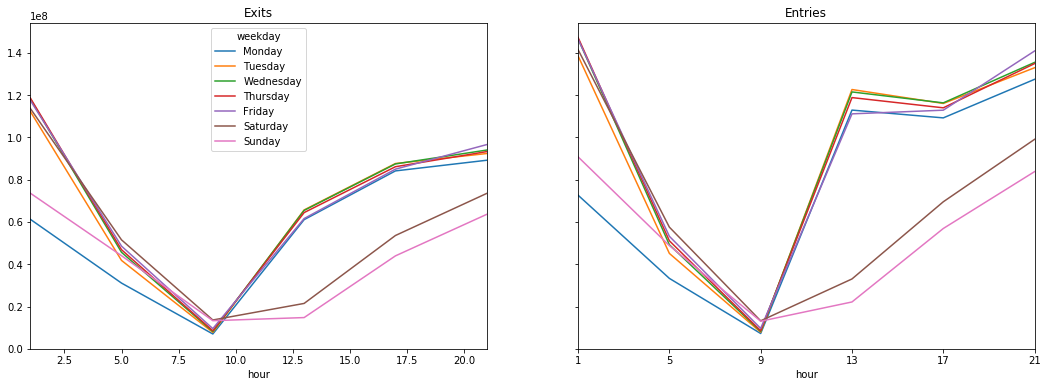

<------------ start_02h ------------>


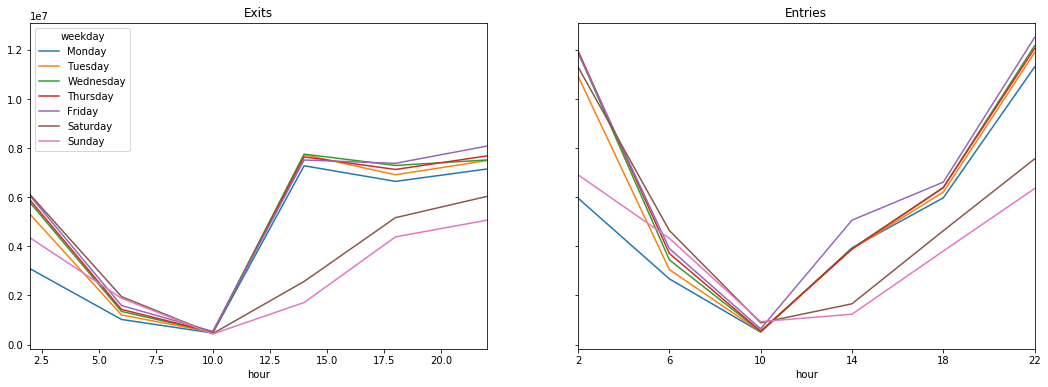

<------------ start_03h ------------>


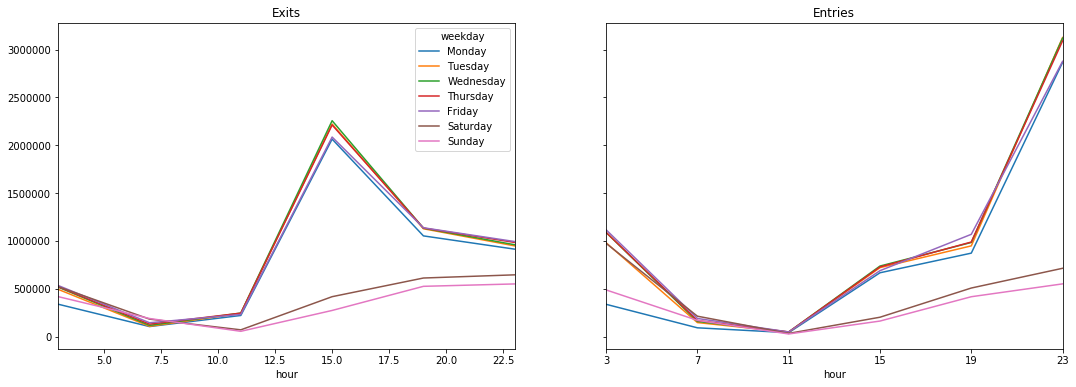

In [10]:
timespan_start = sorted(df['timespan_start'].unique())
for time in timespan_start:
  print(f'<------------ {time} ------------>')
  plot_hourly(df[df['timespan_start'] == time])
  plt.show()

In [0]:
def draw_heatmap(df, row, col, value, ax=None, title=None, cmap='default'):
    ax = ax
    df_group = (df.groupby([row, col])[value].sum()/1e6).reset_index()
    df_group = df_group.set_index([row, col])[value].unstack(0)        
    sns.heatmap(df_group, vmin=-1, cmap=cmap, annot=True,
                linewidths=.5, ax=ax)
    ax.set_title(title)
    ax.tick_params(axis='both', labelrotation=45)

Outra forma de comparar o fluxo é utilizando o heatmap, avaliando os fluxos por dia da semana e faixa de tempo de coleta.

Podemos observar que normalmente há maior movimentação perto do meio dia e no final da tarde; e menos fluxo no início da manhã.

<------------ start_00h ------------>


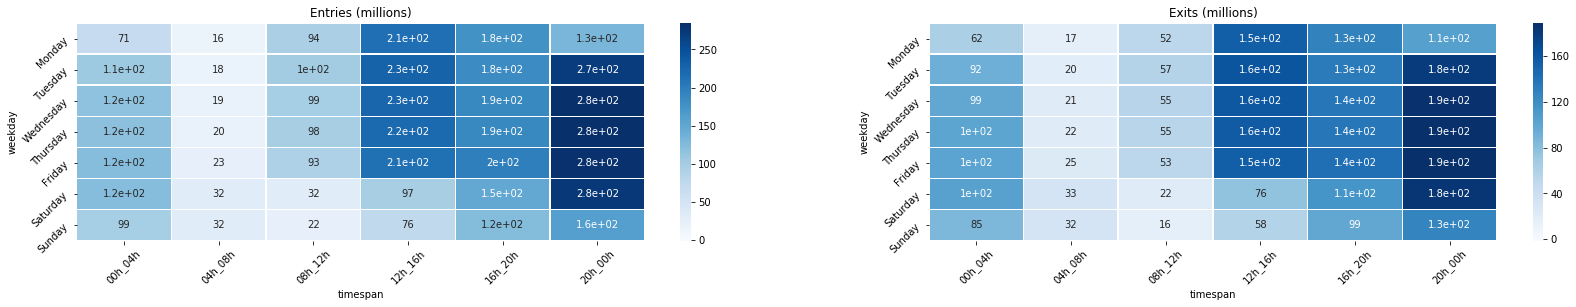

<------------ start_01h ------------>


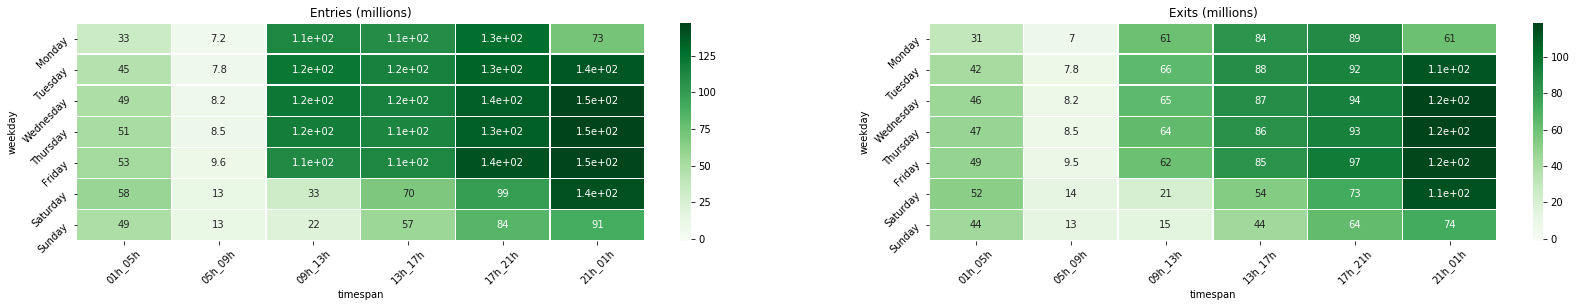

<------------ start_02h ------------>


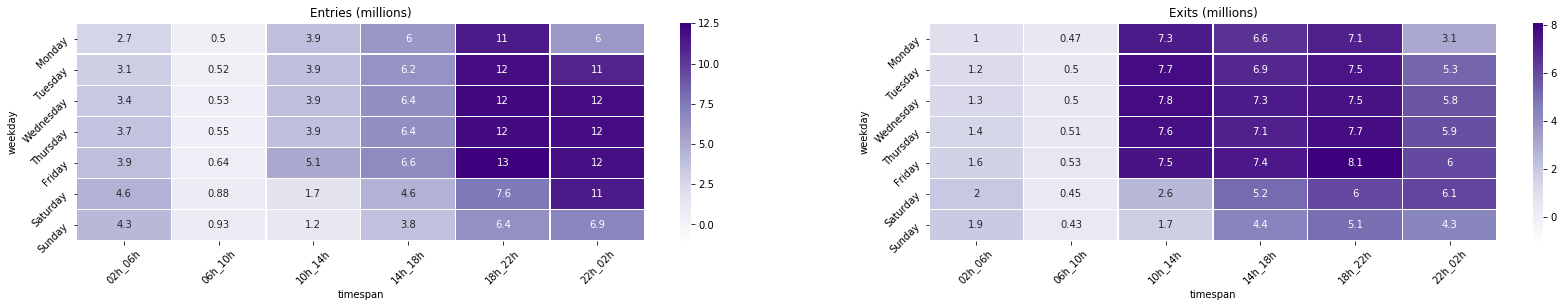

<------------ start_03h ------------>


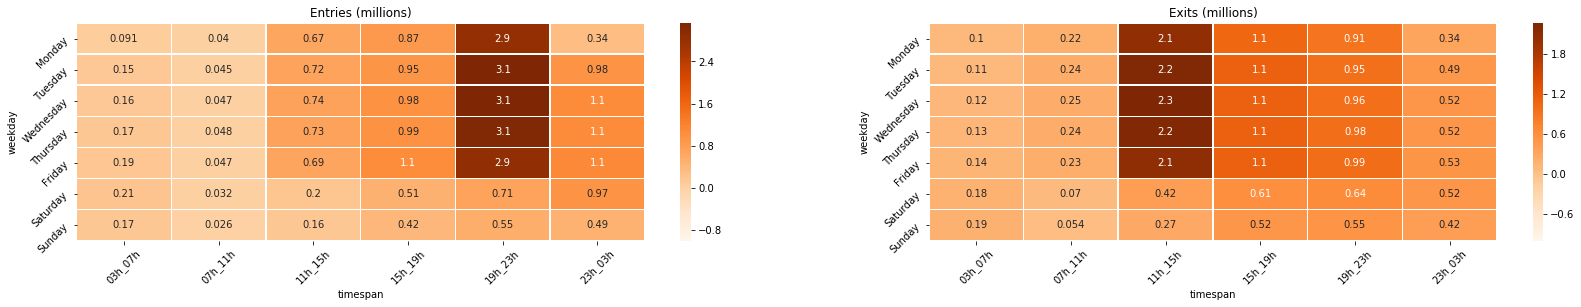

In [9]:
timespan_start = sorted(df['timespan_start'].unique())
cmaps = ['Blues', 'Greens', 'Purples', 'Oranges']

for i, time in enumerate(timespan_start):
  print(f'<------------ {time} ------------>')
  fig, ax = plt.subplots(1, 2, figsize=(28, 4))
  draw_heatmap(df[df['timespan_start'] == time],
              row='timespan', col='weekday',
              value='entries_diff', ax=ax[0],
              title='Entries (millions)', cmap=cmaps[i])

  draw_heatmap(df[df['timespan_start'] == time],
               row='timespan', col='weekday',
              value='exits_diff', ax=ax[1], title='Exits (millions)',
              cmap=cmaps[i])
  
  plt.show()

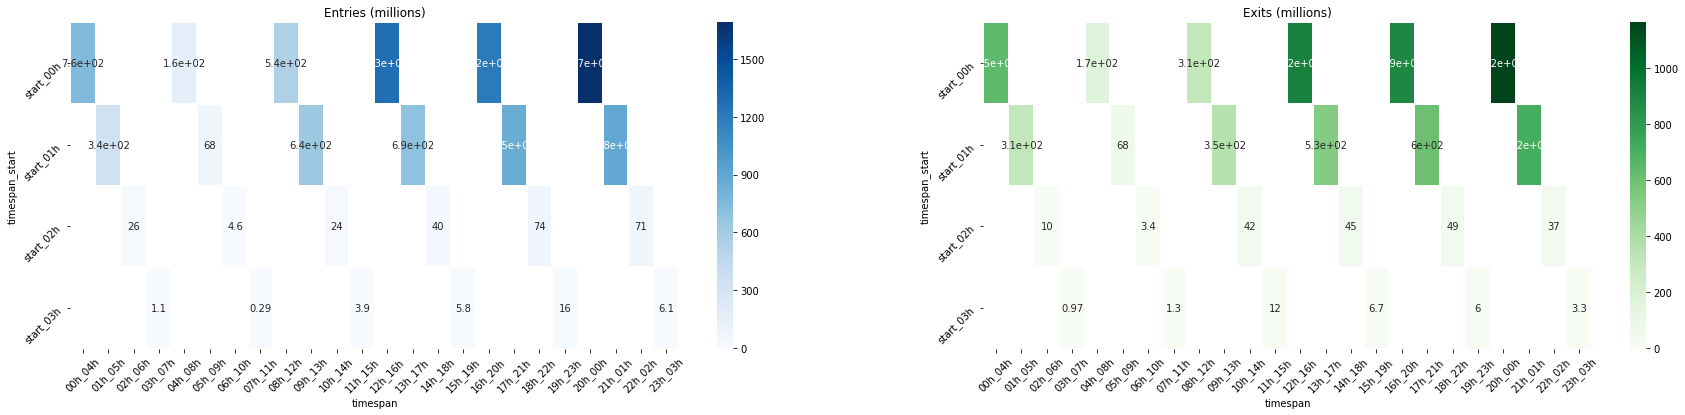

In [11]:
  fig, ax = plt.subplots(1, 2, figsize=(30, 6))

  draw_heatmap(df, row='timespan', col='timespan_start', value='entries_diff',
               ax=ax[0], title='Entries (millions)', cmap='Blues')
  
  draw_heatmap(df, row='timespan', col='timespan_start', value='exits_diff',
               ax=ax[1], title='Exits (millions)', cmap='Greens')

Abaixo estão representados a movimentação para cada dia da semana e mês.

<------------ 2011 ------------>


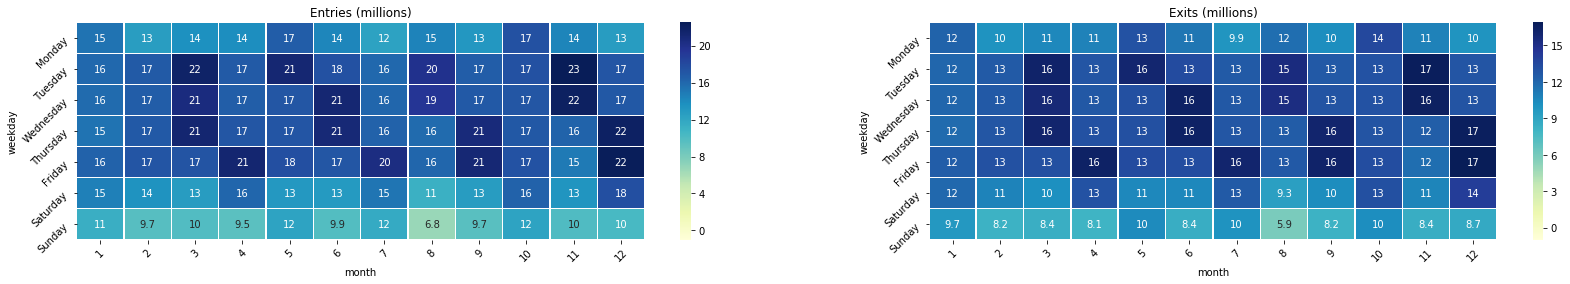

<------------ 2012 ------------>


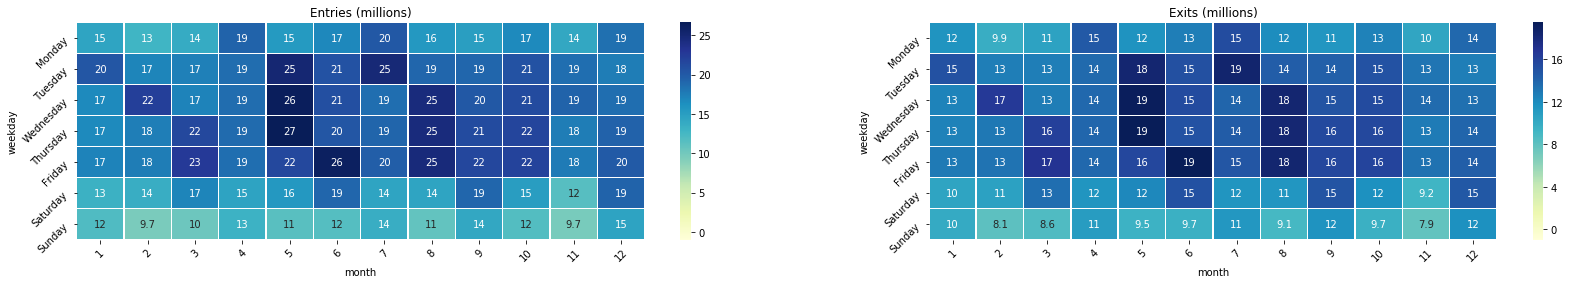

<------------ 2013 ------------>


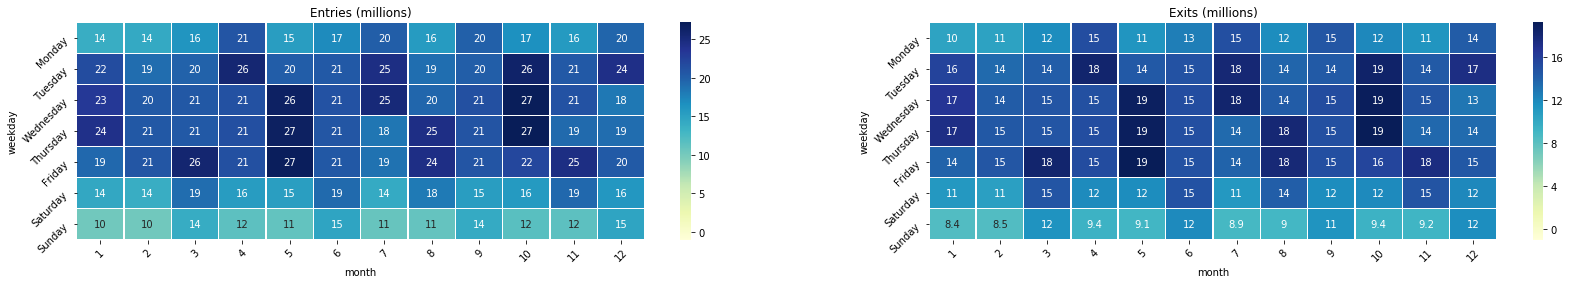

<------------ 2014 ------------>


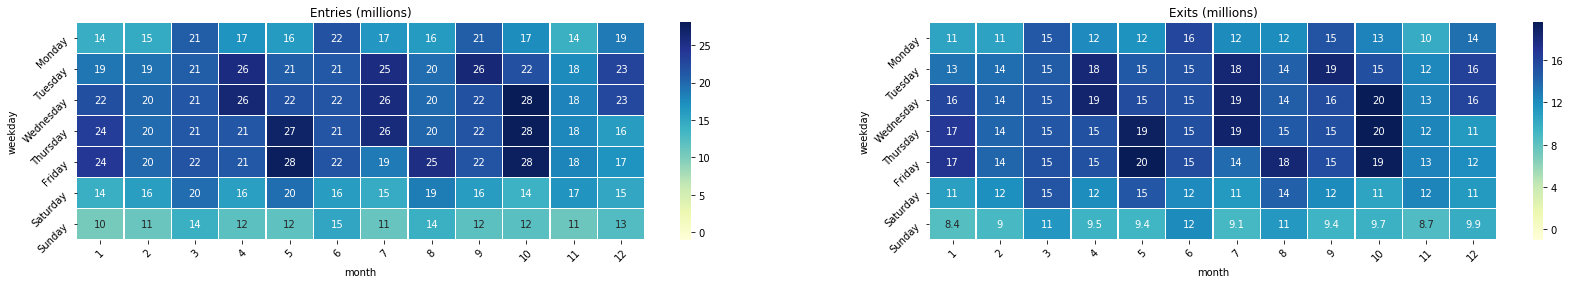

<------------ 2015 ------------>


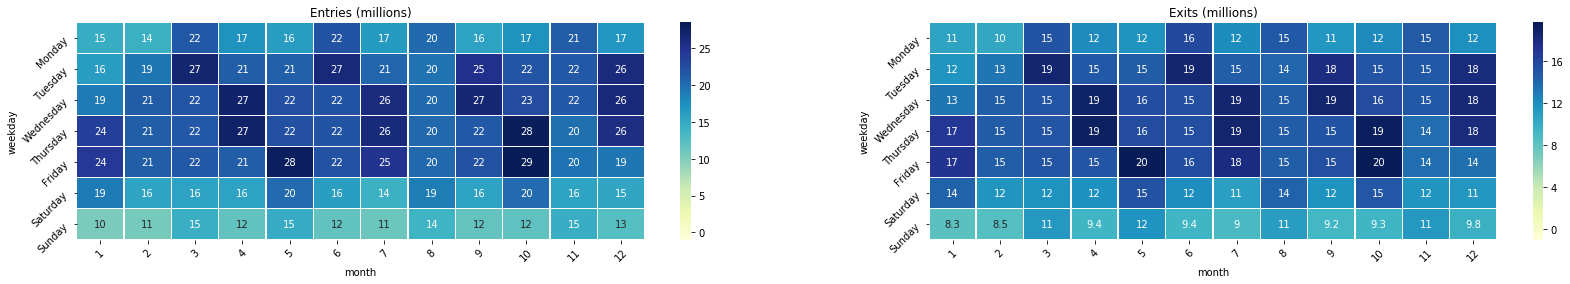

<------------ 2016 ------------>


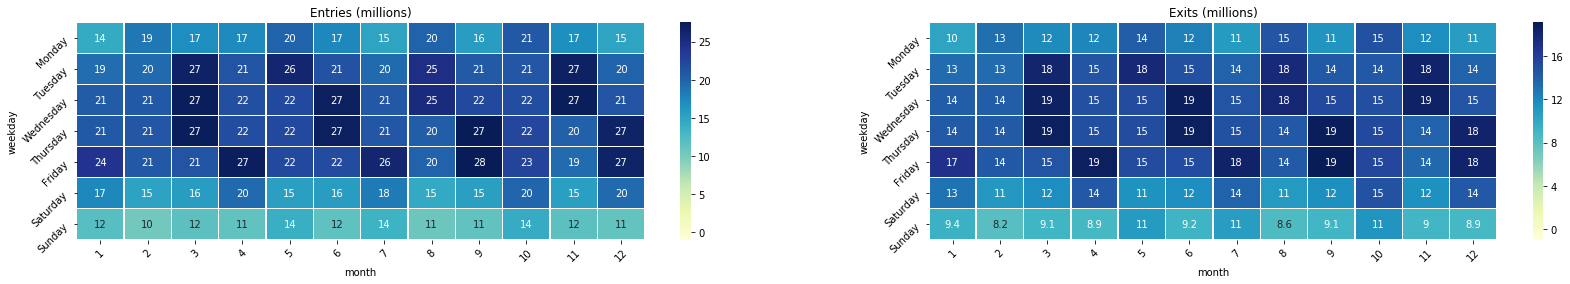

In [12]:
years = sorted(df['year'].unique())

for i, year in enumerate(years):
  print(f'<------------ {year} ------------>')
  fig, ax = plt.subplots(1, 2, figsize=(28, 4))
  draw_heatmap(df[df['year'] == year],
              row='month', col='weekday',
              value='entries_diff', ax=ax[0],
              title='Entries (millions)', cmap='YlGnBu')

  draw_heatmap(df[df['year'] == year],
              row='month', col='weekday',
              value='exits_diff', ax=ax[1], title='Exits (millions)',
              cmap='YlGnBu')
  
  plt.show()

### Categorical plottings

In [13]:
categorical_cols = ['ca', 'unit', 'scp', 'station', 'linename', 'division']
df[categorical_cols].apply(lambda x: len(x.unique()))

ca          718
unit        457
scp         186
station     440
linename    127
division      6
dtype: int64

Acima estão o número de valores únicos para cada dado categórico.
Podemos avaliar se algum deles é redundante, avaliando a correlação entre eles pelo V de Cramer e Theil U, demonstrados abaixo respectivamente.

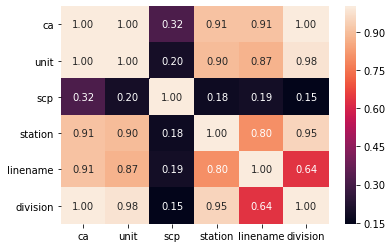

In [14]:
nominal.associations(df[categorical_cols], nominal_columns='all', nan_strategy=None)

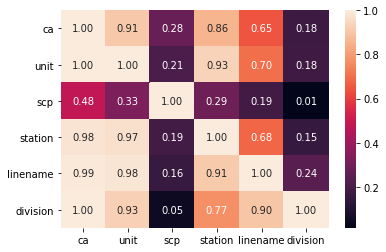

In [0]:
nominal.associations(df[categorical_cols], nominal_columns='all', 
                     theil_u=True, nan_strategy=None)

As variávei `ca` e `unit` parece redundante para várias variáveis do dataset  e podem ser eliminadas no dataset.

Abaixo verificarei como é a distribuição do fluxo de entrada e saída para cada `division`.

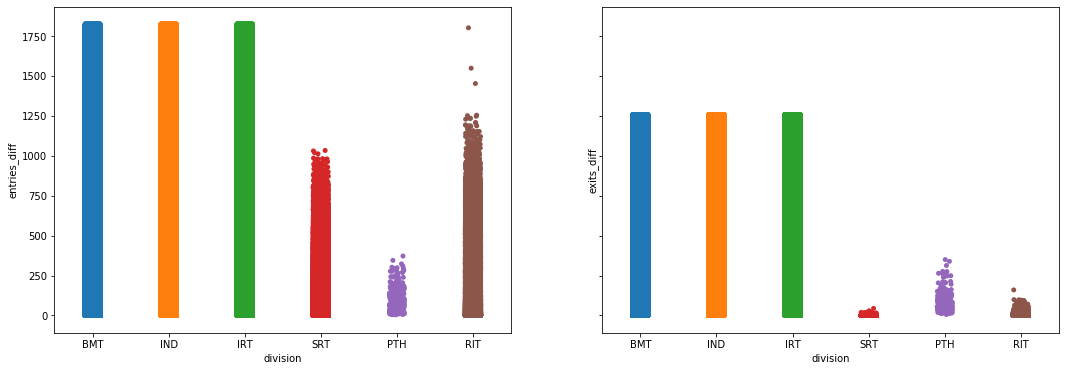

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6),sharey=True)

sns.stripplot(x='division', y='entries_diff', data=df, ax=ax[0])
sns.stripplot(x='division', y='exits_diff', data=df, ax=ax[1])

As divisions `SRT`, `PTH` e `RIT` representam menores valores de entradas e saídas.

Porém, podemos observar abaixo que a volumetria dessas divisions são insignificantes em comparação com as outras 3. Por isso, irei agregá-las em uma nova division `PTH_RIT_SRT`.

In [15]:
df.groupby('division').agg({'entries_diff': lambda x: (100 * x.sum() / df.loc[:, 'entries_diff'].sum()).round(2),
                            'exits_diff': lambda x: (100 * x.sum() / df.loc[:, 'exits_diff'].sum()).round(2)
                            }).rename(columns={'entries_diff': 'entries_diff_%', 'exits_diff': 'exits_diff_%'})

,entries_diff_%,exits_diff_%
division,,
BMT,22.43,22.86
IND,34.43,34.25
IRT,42.73,42.89
PTH,0.00,0.00
RIT,0.16,0.00
SRT,0.25,0.00


In [0]:
df.loc[df['division'].isin(['PTH', 'RIT', 'SRT']), 'division'] = 'PTH_RIT_SRT'

In [17]:
df.groupby('division').agg({'entries_diff': lambda x: (100 * x.sum() / df.loc[:, 'entries_diff'].sum()).round(2),
                            'exits_diff': lambda x: (100 * x.sum() / df.loc[:, 'exits_diff'].sum()).round(2)
                            }).rename(columns={'entries_diff': 'entries_diff_%', 'exits_diff': 'exits_diff_%'})

,entries_diff_%,exits_diff_%
division,,
BMT,22.43,22.86
IND,34.43,34.25
IRT,42.73,42.89
PTH_RIT_SRT,0.41,0.00


### Station and line

Usarei `unit` e `scp` para criar a variável `turnstile` que representa uma catraca única.

E criarei fluxo total `total_traffic`, criado pela soma de entradas e saídas.

In [0]:
df['turnstile'] = df['unit'] + '_' + df['scp']
df['total_traffic'] = df['entries_diff'] + df['exits_diff']

In [0]:
df = pd.concat([df.drop('division', axis=1),
                pd.get_dummies(df['division'], prefix='div', dtype=int)], axis=1)

Realizei a contagem de `turnstile`, `ca`, `unit` e `scp` para cada par `estation` e `linename`.

Em seguida usei o heatmap para avaliar se há correlação dos fluxos (entrada, saída e total) com as diferentes divisions e com a variáveis mencionadas acima.

In [0]:
df_count_cat = df.groupby(['station', 'linename'], as_index=False).agg({'turnstile': lambda x: len(x.unique()),
                                                                                  'ca': lambda x: len(x.unique()),
                                                                                  'unit': lambda x: len(x.unique()),
                                                                                  'scp': lambda x: len(x.unique())})

In [0]:
df_count_cat = pd.merge(df.loc[:,['station', 'linename', 'entries_diff',
                                  'exits_diff','total_traffic', 'div_BMT',
                                  'div_IND','div_IRT', 'div_PTH_RIT_SRT']],
                        df_count_cat, on=['station', 'linename'])

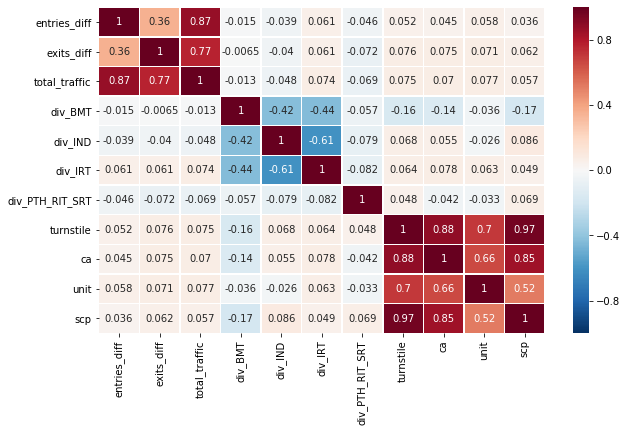

In [0]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_count_cat.iloc[:,2:].corr(), vmin=-1, cmap='RdBu_r', annot=True, linewidths=.5)

As variáveis parecem que não agregam na correlação com os fluxos.
Porém, eliminarei somente `ca`, `unit` e `scp` do dataset.

## Sumarização final do dataset

In [0]:
df.drop(['ca', 'unit', 'scp', 'turnstile',
         'total_traffic', 'timespan_start', 'hour',
         'div_BMT', 'div_IND', 'div_IRT', 'div_PTH_RIT_SRT'], axis=1, inplace=True)

Irei sumarizar os intervalos de horários conforme: `dawn`, `morning`, `midday`, `afternoon`, `evening` e `dusk`.

In [0]:
map_timespan = {'00h_04h': 'dawn', '01h_05h': 'dawn', '02h_06h': 'dawn', '03h_07h': 'dawn',
             '04h_08h': 'morning', '05h_09h': 'morning', '06h_10h': 'morning', '07h_11h': 'morning',
             '08h_12h': 'midday', '09h_13h': 'midday', '10h_14h': 'midday', '11h_15h': 'midday',
             '12h_16h': 'afternoon', '13h_17h': 'afternoon', '14h_18h': 'afternoon', '15h_19h': 'afternoon',
             '16h_20h': 'evening', '17h_21h': 'evening', '18h_22h': 'evening', '19h_23h': 'evening',
             '20h_00h': 'dusk', '21h_01h': 'dusk', '22h_02h': 'dusk', '23h_03h': 'dusk'}

df['timespan'] =  df['timespan'].map(map_timespan)

In [0]:
df_count_cat = df_count_cat[['station', 'linename', 'div_BMT', 'div_IND', 'div_IRT', 'div_PTH_RIT_SRT', 'turnstile']].drop_duplicates()

In [0]:
df_count_cat = df_count_cat.groupby(['station', 'linename'], as_index=False).sum()

Irei granularizar os dados por estação, linha, mês, ano, dia da semana e horário.

In [0]:
df = df.groupby(['station', 'linename', 'month', 'year', 'weekday', 'timespan'], as_index=False).sum()

In [0]:
df = pd.merge(df, df_count_cat, how='left', on=["station", "linename"])

Criei a flag 1 se o dia da semana for final de semana.

In [0]:
# True if weekday is on weekend (saturday or sunday)
df['weekend'] = np.where(df['weekday'].str[0]=='S', 1, 0)

Fiz one-hot enconding para cada horário e mês.

In [0]:
df = pd.concat([df, pd.get_dummies(df['timespan'], prefix='hour', dtype=int)], axis=1)
df = pd.concat([df, pd.get_dummies(df['month'], prefix='month', dtype=int)], axis=1)

In [11]:
df.head()

,station,linename,month,year,weekday,timespan,entries_diff,exits_diff,div_BMT,div_IND,div_IRT,div_PTH_RIT_SRT,turnstile,weekend,hour_afternoon,hour_dawn,hour_dusk,hour_evening,hour_midday,hour_morning,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1 AV,L,1,2011,Friday,afternoon,12654,21800,1,0,0,0,10,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1 AV,L,1,2011,Friday,dawn,15415,17730,1,0,0,0,10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1 AV,L,1,2011,Friday,dusk,18468,6965,1,0,0,0,10,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1 AV,L,1,2011,Friday,evening,14167,15095,1,0,0,0,10,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1 AV,L,1,2011,Friday,midday,2076,3893,1,0,0,0,10,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(1364033, 32)

Por fim, o dataset para modelagem tem 1.364.033 de linhas e está pronto para ser usado para modelagem.

In [0]:
df.to_csv('/content/drive/My Drive/Raizen/df_2.csv.gz', index=False)